In [1]:
import readCorpus as rc
import translateLabels as tl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag

In [4]:
trainingCorpusText = rc.readCorpus('..\\2019\\datasets-v2\\datasets\\train-articles')
trainingCorpusLabels = rc.readCorpusLabels('..\\2019\\datasets-v2\\datasets\\train-labels-SLC')
trainingCorpusLabels['label'] = tl.binaryTranslation_Word2Int(trainingCorpusLabels['label'])

In [5]:
blankList = [0] * len(trainingCorpusText['articleID'])

In [6]:
datasetFeatures = {
    'len':          blankList.copy(),
    'CC':           blankList.copy(),
    'CD' :          blankList.copy(),
    'DT' :          blankList.copy(),
    'EX' :          blankList.copy(),
    'FW' :          blankList.copy(),
    'IN' :          blankList.copy(),
    'JJ' :          blankList.copy(),
    'JJR' :         blankList.copy(),
    'JJS' :         blankList.copy(),
    'LS' :          blankList.copy(),
    'MD' :          blankList.copy(),
    'NN' :          blankList.copy(),
    'NNS' :         blankList.copy(),
    'NNP' :         blankList.copy(),
    'NNPS' :        blankList.copy(),
    'PDT' :         blankList.copy(),
    'POS' :         blankList.copy(),
    'PRP' :         blankList.copy(), 
    'PRP$' :        blankList.copy(),
    'RB' :          blankList.copy(),
    'RBR' :         blankList.copy(),
    'RBS' :         blankList.copy(),
    'RP' :          blankList.copy(),
    'TO' :          blankList.copy(),
    'UH' :          blankList.copy(),
    'VB' :          blankList.copy(),
    'VBD' :         blankList.copy(),
    'VBG' :         blankList.copy(),
    'VBN' :         blankList.copy(),
    'VBP' :         blankList.copy(),
    'VBZ' :         blankList.copy(),
    'WDT' :         blankList.copy(),
    'WP' :          blankList.copy(),
    'WP$' :         blankList.copy(),
    'WRB' :         blankList.copy(),
    'label':        blankList.copy()
}

In [7]:
tokeniser = RegexpTokenizer(r'\w+')

In [8]:
for i in range(len(trainingCorpusText['articleID'])):
    text = trainingCorpusText['text'][i]
    tokens = tokeniser.tokenize(text)
    tagger = Counter([j for i, j in pos_tag(tokens)])
    sentenceLength = len(tokens)
    
    if(sentenceLength) == 0:
        print(i)

    datasetFeatures['len'][i] = sentenceLength
    datasetFeatures['label'][i] = trainingCorpusLabels['label'][i]

    for key in tagger:
        if key in datasetFeatures:
            datasetFeatures[key][i] = tagger[key]

1
3
5
7
9
11
15
17
21
23
25
28
31
33
36
40
42
44
47
49
52
55
59
62
65
67
70
74
77
80
83
87
89
94
97
101
106
109
114
119
128
129
134
140
143
146
152
158
161
166
173
175
177
178
180
182
185
187
191
193
197
200
202
204
206
209
211
215
217
284
291
293
302
308
310
314
316
319
326
336
339
352
357
360
364
369
370
373
375
377
384
386
390
395
400
404
410
411
413
418
421
423
427
430
432
438
441
444
446
447
452
454
456
460
462
465
468
472
476
478
480
482
484
486
489
491
493
495
499
501
504
511
514
517
519
522
524
526
528
531
533
535
541
546
560
564
567
571
578
582
585
594
597
599
604
611
618
622
628
661
679
682
700
703
726
756
760
847
854
863
866
869
870
873
877
881
888
893
896
901
907
909
910
918
927
933
937
942
949
953
955
956
960
988
1006
1026
1028
1029
1031
1033
1040
1044
1047
1056
1062
1068
1070
1074
1082
1086
1088
1091
1093
1097
1099
1101
1103
1105
1107
1109
1113
1116
1126
1134
1137
1139
1141
1146
1149
1151
1154
1187
1208
1222
1258
1271
1307
1327
1360
1413
1490
1518
1566
1599
1702
1714
1733

In [9]:
dataset = pd.DataFrame.from_dict(datasetFeatures)

In [10]:
dataset.head(20)

,len,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,label
0,6,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,1,2,0,0,1,1,0,0,...,1,1,2,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,19,0,0,1,0,0,2,2,0,0,...,2,0,1,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,21,0,0,3,0,0,1,2,0,0,...,1,0,1,0,1,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
len,16965.0,20.154141,14.943535,0.0,9.0,17.0,28.0,132.0
CC,16965.0,0.630828,0.918799,0.0,0.0,0.0,1.0,10.0
CD,16965.0,0.375950,1.056754,0.0,0.0,0.0,0.0,32.0
DT,16965.0,2.110875,2.042153,0.0,1.0,2.0,3.0,19.0
EX,16965.0,0.037017,0.196460,0.0,0.0,0.0,0.0,3.0
FW,16965.0,0.006955,0.092510,0.0,0.0,0.0,0.0,3.0
IN,16965.0,2.526790,2.498019,0.0,1.0,2.0,4.0,24.0
JJ,16965.0,1.329856,1.555393,0.0,0.0,1.0,2.0,15.0
JJR,16965.0,0.035485,0.194634,0.0,0.0,0.0,0.0,3.0
JJS,16965.0,0.033658,0.193288,0.0,0.0,0.0,0.0,3.0


In [12]:
featureMap = []
for i in range(len(datasetFeatures) - 1):
    featureMap.append([0, 0])
    
print(len(featureMap))

36


In [13]:
j = 0
for key in datasetFeatures:
    if key != 'label':
        for i in range(len(datasetFeatures['label'])):
            feature = datasetFeatures[key][i] 
            if feature > 0 and datasetFeatures['label'][i] == 1:
                featureMap[j][0] += 1
            elif feature > 0 and datasetFeatures['label'][i] == 0:
                featureMap[j][1] += 1
        featureMap[j].append(key)
        j += 1
print(j)

36


In [14]:
for i in range(1, len(featureMap)):
    percentage = featureMap[i][0] / (featureMap[i][0] + featureMap[i][1])
    frequency = (featureMap[i][0] + featureMap[i][1]) / 16215
    power = percentage * frequency
    print('{0}:\t\t{1:.2f}\t\t{2:.2f}\t\t{3:.4f}'.format(featureMap[i][2], percentage, frequency, power))

CC:		0.35		0.44		0.1564
CD:		0.26		0.22		0.0577
DT:		0.32		0.80		0.2545
EX:		0.34		0.04		0.0128
FW:		0.37		0.01		0.0024
IN:		0.31		0.81		0.2512
JJ:		0.34		0.65		0.2194
JJR:		0.35		0.04		0.0123
JJS:		0.42		0.03		0.0137
LS:		0.50		0.00		0.0001
MD:		0.32		0.20		0.0633
NN:		0.31		0.85		0.2600
NNS:		0.33		0.54		0.1772
NNP:		0.31		0.71		0.2186
NNPS:		0.44		0.05		0.0214
PDT:		0.42		0.02		0.0065
POS:		0.20		0.00		0.0003
PRP:		0.33		0.48		0.1571
PRP$:		0.38		0.23		0.0878
RB:		0.35		0.51		0.1765
RBR:		0.39		0.02		0.0093
RBS:		0.33		0.01		0.0049
RP:		0.36		0.07		0.0270
TO:		0.33		0.43		0.1424
UH:		0.15		0.00		0.0006
VB:		0.33		0.47		0.1549
VBD:		0.30		0.48		0.1452
VBG:		0.36		0.33		0.1179
VBN:		0.32		0.38		0.1219
VBP:		0.36		0.30		0.1085
VBZ:		0.36		0.41		0.1457
WDT:		0.38		0.11		0.0410
WP:		0.39		0.12		0.0478
WP$:		0.43		0.01		0.0022
WRB:		0.36		0.09		0.0313


In [24]:
featureStats = {
    'feature' : [],
    'percentage' : [],
    'frequency' : [],
    'power' : []
}

featureNames = [
    'Coordinating Conjunction',
    'Cardinal Digit',
    'Determiner',
    'Existential',
    'Foreign Word',
    'Preposition',
    'Adjective',
    'Comparative Adjective',
    'Superlative Adjective',
    'List Marker',
    'Modal',
    'Noun',
    'Noun Plural',
    'Proper Noun',
    'Proper Noun Plural',
    'Predeterminer',
    'Possive Ending',
    'Personal Pronoun',
    'Possessive Pronoun',
    'Adverb',
    'Comparative Adverb',
    'Superlative Adverb',
    'Particle',
    'To',
    'Interjection',
    'Verb',
    'Past-Tense Verb',
    'Verb-1',
    'Verb-2',
    'Verb-3',
    'Verb-4',
    'wh-Determiner',
    'wh-Pronoun',
    'Possessive wh-Pronoun',
    'wh-Adverb'
]

for i in range(1, len(featureMap)):
    featureStats['feature'].append(featureNames[i-1])
    featureStats['percentage'].append(featureMap[i][0] / (featureMap[i][0] + featureMap[i][1]))
    featureStats['frequency'].append((featureMap[i][0] + featureMap[i][1]) / 16215)
    featureStats['power'].append(featureStats['percentage'][i-1] * featureStats['frequency'][i-1])
    

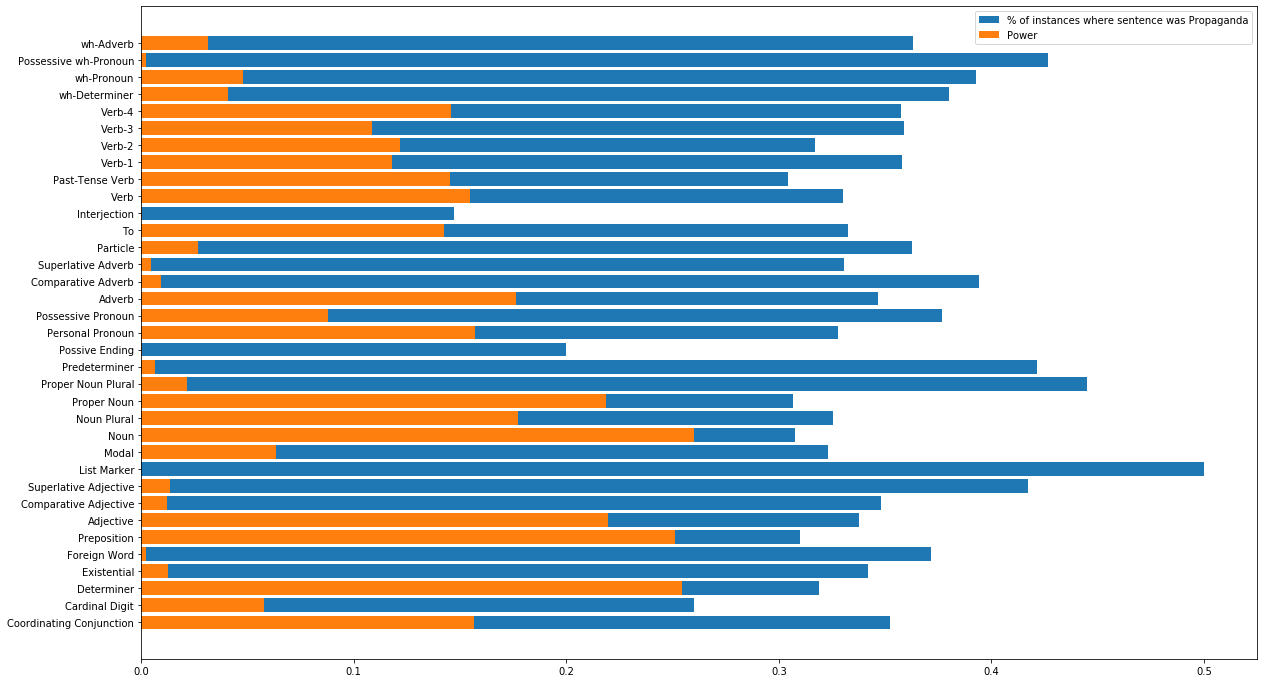

In [54]:
fig, ax = plt.subplots(figsize=(20, 12))


ax.barh(featureStats['feature'], featureStats['percentage'], 0.8, label='% of instances where sentence was Propaganda')
ax.barh(featureStats['feature'], featureStats['power'], 0.8, label='Power')

ax.legend()